In [2]:

import random
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# import zipfile
# zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Research/Thesis (4 - II)/Classification/Data/Jahid/Data.zip', 'r')
# file = zip_ref.extractall("./tmp")
# zip_ref.close()

# print("o")

In [5]:
DATASET="/content/tmp"


# `LBP`

In [6]:
# import the necessary packages
from skimage import feature
import numpy as np
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius
	def describe(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
		# return the histogram of Local Binary Patterns
		return lbp

In [7]:
# initialize the local binary patterns descriptor along with
lbp = LocalBinaryPatterns(50, 8)

In [8]:
import os
import cv2


CATEGORIES = ['CNV', 'DME', 'DRUSEN', 'NORMAL']
        
train_data=[]
lbp_data = []

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        for img_file in os.listdir(path):
            img_main=cv2.imread(os.path.join(path,img_file),1)
            img_main = cv2.resize(img_main,(224,224))

            img_rgb=cv2.cvtColor(img_main,cv2.COLOR_BGR2RGB)
    
            img_gray = cv2.cvtColor(img_main, cv2.COLOR_BGR2GRAY)

            lbp_img =  lbp.describe(img_gray)  
            # print(lbp_img.shape)         
            train_data.append([img_rgb,label])
            lbp_data.append([lbp_img,label])
            

print(len(train_data))
print(len(lbp_data))

3637
3637


In [9]:
random.shuffle(lbp_data)
random.shuffle(lbp_data)
random.shuffle(lbp_data)
random.shuffle(lbp_data)

In [10]:
for lbl in lbp_data[:10]:
    print(lbl[1])

0
1
2
2
2
0
2
3
3
3


In [11]:
X, y = [], []
for features,label in lbp_data:
    X.append(features)
    y.append(label)


In [12]:
len(X)

3637

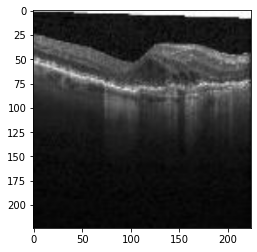

In [13]:
plt.imshow(train_data[0][0])

In [14]:
X_arr = np.array(X)
X_arr = X_arr.reshape((-1, 224*224*1))
y_arr = np.array(y)
X_arr.shape, y_arr.shape

((3637, 50176), (3637,))

In [15]:
Xtrain, Xtest, ytrain, ytest  = train_test_split(X_arr, y_arr, test_size=0.2, shuffle=True, random_state=9990)


In [16]:
Xtrain.shape

(2909, 50176)

# SVM

In [17]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

svc = SVC(kernel='rbf', class_weight='balanced')
model_svm = make_pipeline(svc)

In [18]:
param_grid = {'svc__C': [50],
              'svc__gamma': [0.005]}
grid = GridSearchCV(model_svm, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
model = model_svm

In [20]:
# model = grid.best_estimator_
yfit = model.predict(Xtest)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=CATEGORIES))

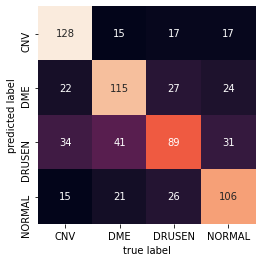

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=CATEGORIES,
            yticklabels=CATEGORIES)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
ss

# `PCA With SVM` 

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
model_pca_svm = SVC(kernel='rbf', class_weight='balanced')
model_pca_svm.fit(Xtrain, ytrain)

In [ ]:
model = model_pca_svm

In [ ]:
# model = grid.best_estimator_
yfit = model.predict(Xtest)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=CATEGORIES))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=CATEGORIES,
            yticklabels=CATEGORIES)
plt.xlabel('true label')
plt.ylabel('predicted label');